# Chapter 3 - Ex3: Diabetes
## Cho dữ liệu diabetes.csv

## Yêu cầu: Áp dụng thuật toán LogisticRegression để thực hiện việc dự đoán khả năng dương tính với bệnh tiểu đường 
## (positive diabete - outputs) dựa trên các biến lâm sàng khác (clinical variables - inputs)
1. Đọc dữ liệu, trực quan hóa dữ liệu. Chuẩn hóa dữ liệu (nếu cần)
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.3
3. Áp dụng thuật toán LogisticRegression
4. Tìm kết quả
5. Hãy cho biết với những người có pregnant, glucose, pressure, triceps, insulin, mass, pedigree, age lần lượt như sau thì ai có khả năng dương tính với bệnh tiểu đường, ai không?

* [8, 176, 90, 34, 300, 33.7, 0.467, 58]
* [1, 100, 66, 15, 56, 23.6, 0.666, 26]
* [12, 88, 74, 40, 54, 35.3, 0.378, 48]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10)

## <span style='color:brown'>1. Đọc dữ liệu, trực quan hóa dữ liệu. Chuẩn hóa dữ liệu (nếu cần)

In [2]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Output is imbalanced => Use SMOTE to upsample

## <span style='color:brown'>2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.3
## <span style='color:brown'>3. Áp dụng thuật toán LogisticRegression
## <span style='color:brown'>4. Tìm kết quả

In [6]:
x = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

logreg_pipe = Pipeline([
    ('SMOTE_oversample', SMOTE(random_state=1)),
    ('Robust_Scale', RobustScaler()),
    ('Logistic_Regression', LogisticRegression(max_iter=500))
])

logreg_pipe.fit(x_train, y_train)

Pipeline(steps=[('SMOTE_oversample', SMOTE(random_state=1)),
                ('Robust_Scale', RobustScaler()),
                ('Logistic_Regression', LogisticRegression(max_iter=500))])

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score

y_test_pred = logreg_pipe.predict(x_test)
y_test_proba = logreg_pipe.predict_proba(x_test)

print(f'Accuracy score on train set: {accuracy_score(y_train, logreg_pipe.predict(x_train))}')
print(f'Accuracy score on test set: {accuracy_score(y_test, y_test_pred)}')

labels = ['no_diabetes', 'yes_diabetes']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')

print(f'\n\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')

Accuracy score on train set: 0.750465549348231
Accuracy score on test set: 0.8008658008658008

Confusion matrix:
               no_diabetes  yes_diabetes
no_diabetes           120            26
yes_diabetes           20            65


Classification report:
               precision    recall  f1-score   support

 no_diabetes       0.86      0.82      0.84       146
yes_diabetes       0.71      0.76      0.74        85

    accuracy                           0.80       231
   macro avg       0.79      0.79      0.79       231
weighted avg       0.80      0.80      0.80       231



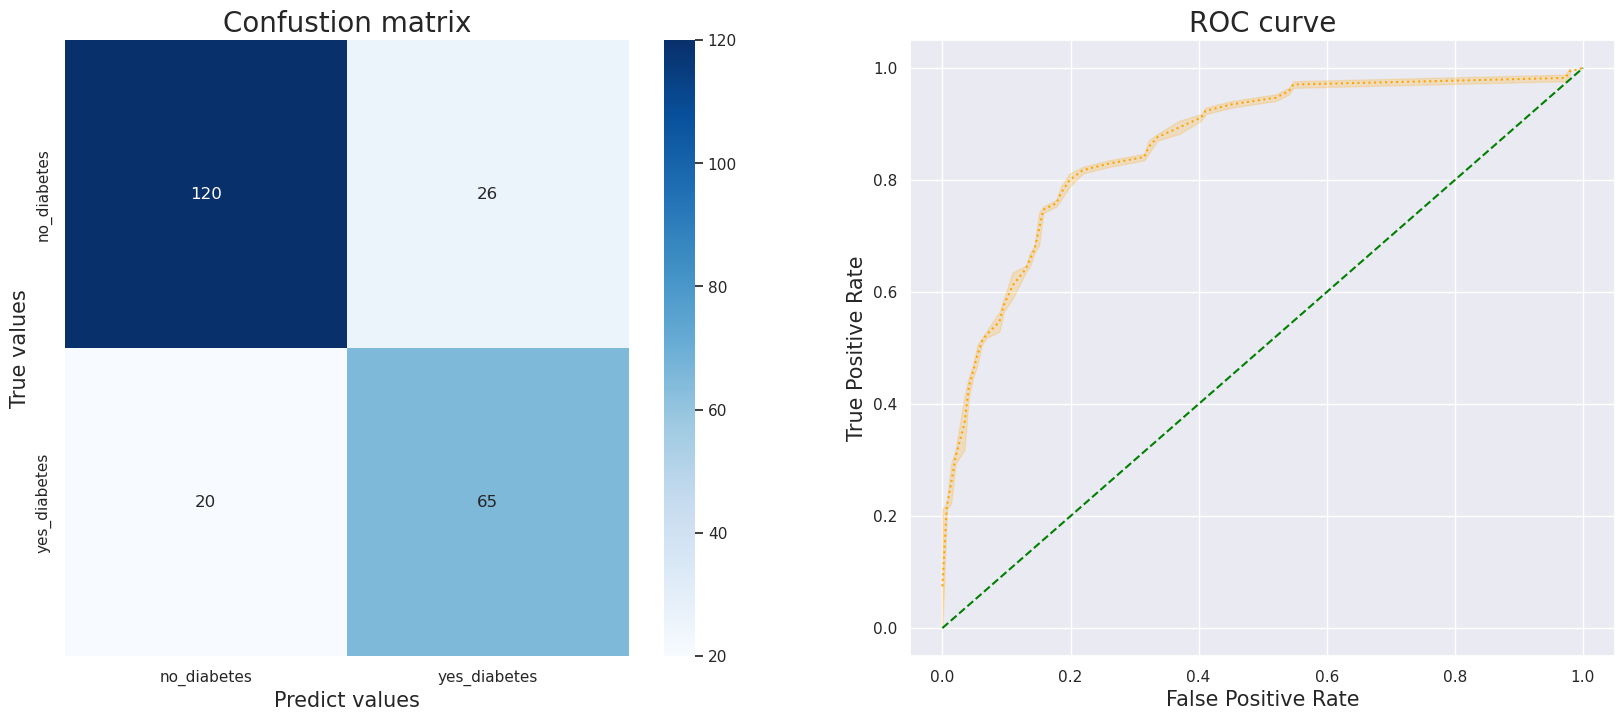

In [8]:
fpr, tpr, threshold = roc_curve(y_test, y_test_proba[:,1])

sbn.set_theme(style='darkgrid')

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='Blues', fmt='g', annot=True)
plt.xlabel('Predict values', size=15)
plt.ylabel('True values', size=15)
plt.title('Confustion matrix', size=20)

plt.subplot(1,2,2)
sbn.lineplot(x=[0,1], y=[0,1], linestyle='--', color='green')
sbn.lineplot(x=fpr, y=tpr, linestyle='dotted', color='orange')
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC curve', size=20)
plt.show()

## <span style='color:brown'>5. Hãy cho biết với những người có pregnant, glucose, pressure, triceps, insulin, mass, pedigree, age lần lượt như sau thì ai có khả năng dương tính với bệnh tiểu đường, ai không?

* [8, 176, 90, 34, 300, 33.7, 0.467, 58]
* [1, 100, 66, 15, 56, 23.6, 0.666, 26]
* [12, 88, 74, 40, 54, 35.3, 0.378, 48]

In [60]:
x_new = np.array([[8, 176, 90, 34, 300, 33.7, 0.467, 58],
                  [1, 100, 66, 15, 56, 23.6, 0.666, 26],
                  [12, 88, 74, 40, 54, 35.3, 0.378, 48]])

x_new = pd.DataFrame(x_new, columns=x.columns)
x_new['Outcome_predict'] = logreg_pipe.predict(x_new)

x_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_predict
0,8.0,176.0,90.0,34.0,300.0,33.7,0.467,58.0,1
1,1.0,100.0,66.0,15.0,56.0,23.6,0.666,26.0,0
2,12.0,88.0,74.0,40.0,54.0,35.3,0.378,48.0,0


## <span style='color:brown'> Use select_k_best to choose important features

In [56]:
x = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

from sklearn.feature_selection import SelectKBest, f_classif
#The feature are all numeric, not categorical so use f_classif to calculate scores

kbest = SelectKBest(score_func=f_classif, k='all').fit(x, y)

df_kbest_score = pd.DataFrame({
    'Features':x.columns,
    'Scores':kbest.scores_
})

print(df_kbest_score.sort_values(by='Scores', ascending=False))

                   Features      Scores
1                   Glucose  213.161752
5                       BMI   71.772072
7                       Age   46.140611
0               Pregnancies   39.670227
6  DiabetesPedigreeFunction   23.871300
4                   Insulin   13.281108
3             SkinThickness    4.304381
2             BloodPressure    3.256950


## Remove SkinThickness and BloodPressure

Accuracy score on train set: 0.7281191806331471
Accuracy score on test set: 0.7922077922077922

Confusion matrix:
               no_diabetes  yes_diabetes
no_diabetes           116            30
yes_diabetes           18            67


Classification report:
               precision    recall  f1-score   support

 no_diabetes       0.87      0.79      0.83       146
yes_diabetes       0.69      0.79      0.74        85

    accuracy                           0.79       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.80      0.79      0.79       231




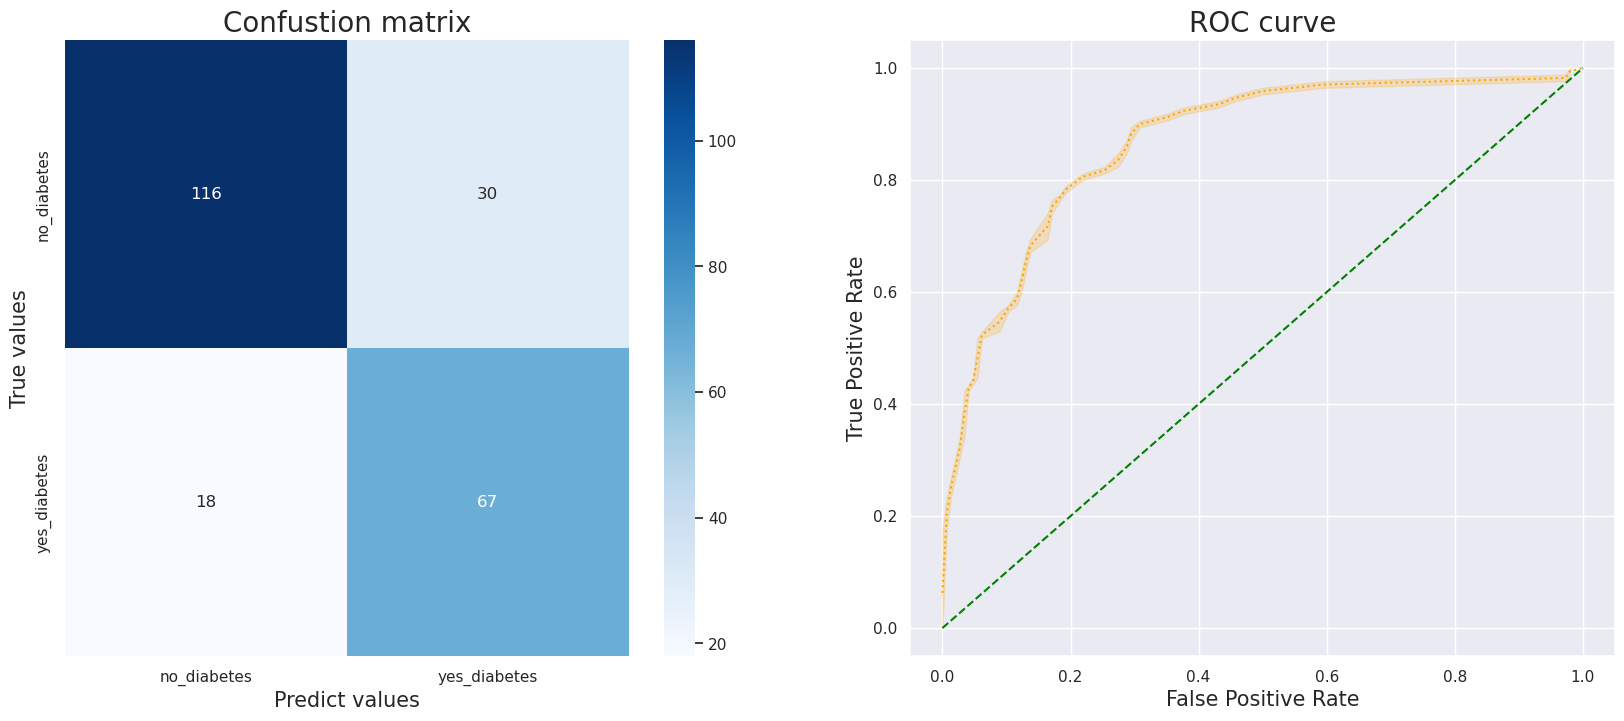

In [57]:
x = diabetes.drop(['Outcome', 'SkinThickness', 'BloodPressure'], axis=1)
y = diabetes['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

logreg_pipe.fit(x_train, y_train)

y_test_pred = logreg_pipe.predict(x_test)
y_test_proba = logreg_pipe.predict_proba(x_test)

print(f'Accuracy score on train set: {accuracy_score(y_train, logreg_pipe.predict(x_train))}')
print(f'Accuracy score on test set: {accuracy_score(y_test, y_test_pred)}')

labels = ['no_diabetes', 'yes_diabetes']
cm_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=labels, columns=labels)
print(f'\nConfusion matrix:\n {cm_df}')

print(f'\n\nClassification report:\n {classification_report(y_test, y_test_pred, target_names=labels)}')
print()
fpr, tpr, threshold = roc_curve(y_test, y_test_proba[:,1])

sbn.set_theme(style='darkgrid')

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sbn.heatmap(cm_df, cmap='Blues', fmt='g', annot=True)
plt.xlabel('Predict values', size=15)
plt.ylabel('True values', size=15)
plt.title('Confustion matrix', size=20)

plt.subplot(1,2,2)
sbn.lineplot(x=[0,1], y=[0,1], linestyle='--', color='green')
sbn.lineplot(x=fpr, y=tpr, linestyle='dotted', color='orange')
plt.xlabel('False Positive Rate', size=15)
plt.ylabel('True Positive Rate', size=15)
plt.title('ROC curve', size=20)
plt.show()

## Nothing changes much after choosing k_best_features